# **1. Background**

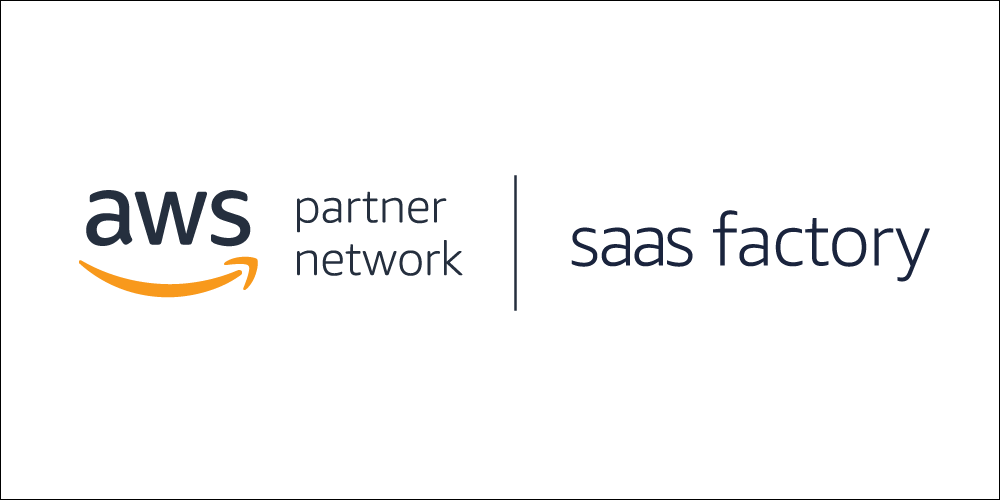

Amazon Web Service (AWS) is world leading cloud technologies that provides Software as a Service for clients since 2006.
The products of AWS are related to networking, computing, storage, middleware, IoT and others through their server farms.
The services are delivered throguh a network of AWS server farms. The fees model is a combination of usage hardware, operating system, software and networking features chosen by subscriber.

## **1.1. Problem Statement**

1. Sales and Profit Analysis:
    - What are the monthly trend of profit?
    - What is the effect of discounts on profit margin?
    - What is the product profitability and sales performance?
2. Customer Segmentation Analysis:
    - What are the industries or customers that yield the most profit or losses?
3. Geographical Analysis:
    - Product Distribution throughout regions or sub regions or cities.
    - Which region is underperforming?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from operator import attrgetter
from scipy import stats
from datetime import datetime
from operator import attrgetter
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# **2.1. Data Understanding**

In this section, we will be cleaning the data from N/A values and outliers that can pose problem to the analysis.

In [2]:
# importing the data
data_1 = pd.read_csv('SaaS-Sales.csv', dtype= {'Customer ID': 'str', 'Date Key': 'str'})
data_1['Order Date'] = pd.to_datetime(data_1['Order Date'])
data_1.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [3]:
data_1.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

As the profit ratio outliers are mostly in negative, hence we need to know what product and why it is incurring losses, hence we cannot delete the outliers.

### Columns:
1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction


# **2.2. Data Cleaning**

- Checking columns

In [4]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   object        
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   object        
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [5]:
data_1.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
data_1.duplicated().sum()

np.int64(0)

- There is no N/A values, so we don't need to fill in any of the columns.
- There is no duplicated values as well.
- As the Date key is the same as order date, we could delete the column.
- As the Row ID is already represented by the index in the dataframe, we could delete it.

In [7]:
data_1_clean = data_1.drop(columns= ['Row ID', 'Date Key'])
data_1_clean.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [8]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

In [9]:
data_1_clean['Country'].unique()

array(['Ireland', 'United States', 'Germany', 'Sweden', 'Canada', 'Japan',
       'Italy', 'Turkey', 'Costa Rica', 'France', 'Australia',
       'Luxembourg', 'Brazil', 'Philippines', 'India', 'United Kingdom',
       'Chile', 'Spain', 'South Africa', 'Portugal', 'Colombia',
       'Belgium', 'Russia', 'Netherlands', 'Mexico', 'Poland',
       'Singapore', 'New Zealand', 'Czech Republic', 'Saudi Arabia',
       'Argentina', 'South Korea', 'Finland', 'Israel', 'Norway',
       'Ukraine', 'United Arab Emirates', 'Greece', 'China', 'Austria',
       'Indonesia', 'Egypt', 'Denmark', 'Croatia', 'Taiwan', 'Qatar',
       'Slovenia', 'Iceland'], dtype=object)

In [10]:
data_1_clean['Region'].unique()

array(['EMEA', 'AMER', 'APJ'], dtype=object)

In [11]:
data_1_clean['Subregion'].unique()

array(['UKIR', 'NAMER', 'EU-WEST', 'NOR', 'JAPN', 'EU', 'MEA', 'LATAM',
       'ANZ', 'APAC', 'IND', 'EU-EAST'], dtype=object)

In [12]:
data_1_clean['Customer'].unique()

array(['Chevron', 'Phillips 66', 'Royal Dutch Shell', 'BNP Paribas',
       'Engie', 'Microsoft', 'Pfizer', 'Toyota Motor', 'Home Depot',
       'Wells Fargo', 'Carrefour', 'Costco Wholesale', 'McKesson',
       'Siemens', 'Intel', 'Glencore', 'Procter & Gamble',
       'Banco Santander', 'Pemex', 'Samsung Electronics', 'Sony',
       'Morgan Stanley', 'Bank of America Corp.', 'Tesco', 'Aviva',
       'Mondelez International', 'Abbott Laboratories', 'Fannie Mae',
       'Aetna', 'Oracle', 'Nissan Motor', 'Tyson Foods',
       'Verizon Communications', 'Itochu', 'Daimler', 'Walgreens',
       'Boeing', 'Valero Energy', 'Nestle', 'Philip Morris International',
       'Trafigura Group', 'Walmart', 'Cisco Systems',
       'Prudential Financial', 'Amazon', 'Gazprom', 'FedEx',
       'Honda Motor', 'CVS Health', 'General Motors',
       'State Farm Insurance Cos.', 'Comcast', 'AmerisourceBergen',
       'Johnson & Johnson', 'HonHai Precision Industry',
       'American Express', 'J.P. Morgan

In [13]:
data_1_clean['Contact Name'].unique()

array(['Nathan Bell', 'Deirdre Bailey', 'Zoe Hodges', 'Thomas Hodges',
       'Adrian Hunter', 'Adrian Abraham', 'Emily Morrison',
       'Claire Welch', 'Carol Campbell', 'Blake Hughes', 'Melanie Sharp',
       'Luke Bower', 'Jonathan Ferguson', 'Sam Parsons', 'Neil Gill',
       'Amelia Campbell', 'Chloe Short', 'Jasmine Metcalfe',
       'Karen Mathis', 'Dylan Dickens', 'Sophie Lewis', 'Gavin Mitchell',
       'Katherine Dowd', 'Harry Brown', 'Brian Dickens', 'Joseph Newman',
       'Nicola Howard', 'Stewart Wilson', 'Eric McLean', 'Leah Clarkson',
       'Alison Davidson', 'Sophie Vance', 'Anne Lee', 'Maria Dyer',
       'Julia Ellison', 'Gordon McLean', 'Jessica Buckland',
       'Bernadette Nolan', 'Sonia Ince', 'William Lewis', 'Melanie Young',
       'Edward Oliver', 'Peter Quinn', 'Max Marshall', 'Jan Watson',
       'Carol Ball', 'Gavin Walsh', 'Penelope Peake', 'Amy Scott',
       'Carl Jackson', 'Joe Wallace', 'Luke Mills', 'Alexandra Dyer',
       'Rebecca Dickens', 'Audre

In [14]:
data_1_clean['City'].unique()

array(['Dublin', 'New York City', 'Stuttgart', 'Stockholm', 'Toronto',
       'Saitama', 'Naples', 'Ankara', 'Los Angeles', 'San José', 'Paris',
       'Istanbul', 'Tokyo', 'Aichi', 'Wollongong', 'Hanover',
       'Luxembourg', 'Salvador', 'Davao City', 'Kolkata', 'London',
       'Brighton', 'Sydney', 'Puente Alto', 'Madrid', 'Rio de Janeiro',
       'Cape Town', 'Lisboa', 'Uppsala', 'Bogotá', 'Brussels', 'Moscow',
       'Canberra', 'The Hague', 'Mexico City', 'Manila', 'Geelong',
       'Santiago', 'Aurora', 'Warsaw', 'Newark', 'Monterrey', 'Rome',
       'Chicago', 'Singapore', 'Wellington', 'Osaka', 'Melbourne',
       'Prague', 'Riyadh', 'Raleigh', 'Providence', 'Córdoba',
       'Guadalajara', 'Oklahoma City', 'Puerto Vallarta', 'São Paulo',
       'Johannesburg', 'Cologne', 'Rochester', 'Seattle', 'Detroit',
       'Lafayette', 'Munich', 'St Petersburg', 'Buenos Aires', 'Mendoza',
       'Leipzig', 'Jacksonville', 'Long Beach', 'Chiba', 'Incheon',
       'Helsinki', 'Dhahran', 

In [15]:
data_1_clean['Industry'].unique()

array(['Energy', 'Finance', 'Tech', 'Healthcare', 'Manufacturing',
       'Retail', 'Consumer Products', 'Misc', 'Transportation',
       'Communications'], dtype=object)

In [16]:
data_1_clean['Segment'].unique()

array(['SMB', 'Strategic', 'Enterprise'], dtype=object)

In [17]:
data_1_clean['Product'].unique()

array(['Marketing Suite', 'FinanceHub', 'ContactMatcher',
       'Marketing Suite - Gold', 'SaaS Connector Pack', 'ChatBot Plugin',
       'Site Analytics', 'OneView', 'Support', 'Data Smasher',
       'SaaS Connector Pack - Gold', 'Storage', 'Big Ol Database',
       'Alchemy'], dtype=object)

In [18]:
# Difference between customer ID and the name
data_1_clean['Customer'].nunique() - data_1_clean['Customer ID'].nunique()

0

In [19]:
data_1_clean[['Customer ID', 'Customer']].drop_duplicates().reset_index(drop= True)

,Customer ID,Customer
0,1017,Chevron
1,1056,Phillips 66
2,1031,Royal Dutch Shell
3,1065,BNP Paribas
4,1062,Engie
...,...,...
94,1071,News Corp.
95,1016,Caterpillar
96,1020,Citigroup
97,1091,Panasonic


- This means that there are no difference in customers and each of them had a unique ID.

## Checking for Outliers:

- There are 4 columns that have numerical values to be checked: Sales, Profit, Discount and Quantity. The data will be grouped by products.

In [20]:
data_1_description = data_1_clean[['Sales', 'Quantity', 'Discount', 'Profit']].describe()
data_1_description

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


- From the description, there are no weird values in the sales, quantity and discount as there were no negative numbers. Except for profit as it can be gains or losses.

In [21]:
numeric_col = ['Sales', 'Quantity', 'Discount', 'Profit']
outliers = []
for i in numeric_col:
    i_IQR = data_1_description.loc['75%'][i] - data_1_description.loc['25%'][i]
    Q1 = data_1_description.loc['25%'][i]
    Q3 = data_1_description.loc['75%'][i]
    i_outlier = len(data_1_clean[data_1_clean[i] < (Q1 - 1.5 * i_IQR)]) + len(data_1_clean[data_1_clean[i] > (Q3 + 1.5 * i_IQR)])
    outliers.append(i_outlier)
df_outliers = pd.DataFrame({'Type' : numeric_col, 'Num of Outliers' : outliers})
df_outliers['Percentage'] = df_outliers['Num of Outliers'].apply(lambda a: a/len(data_1_clean)) * 100
df_outliers

,Type,Num of Outliers,Percentage
0,Sales,1167,11.677006
1,Quantity,170,1.701021
2,Discount,856,8.565139
3,Profit,1881,18.821293


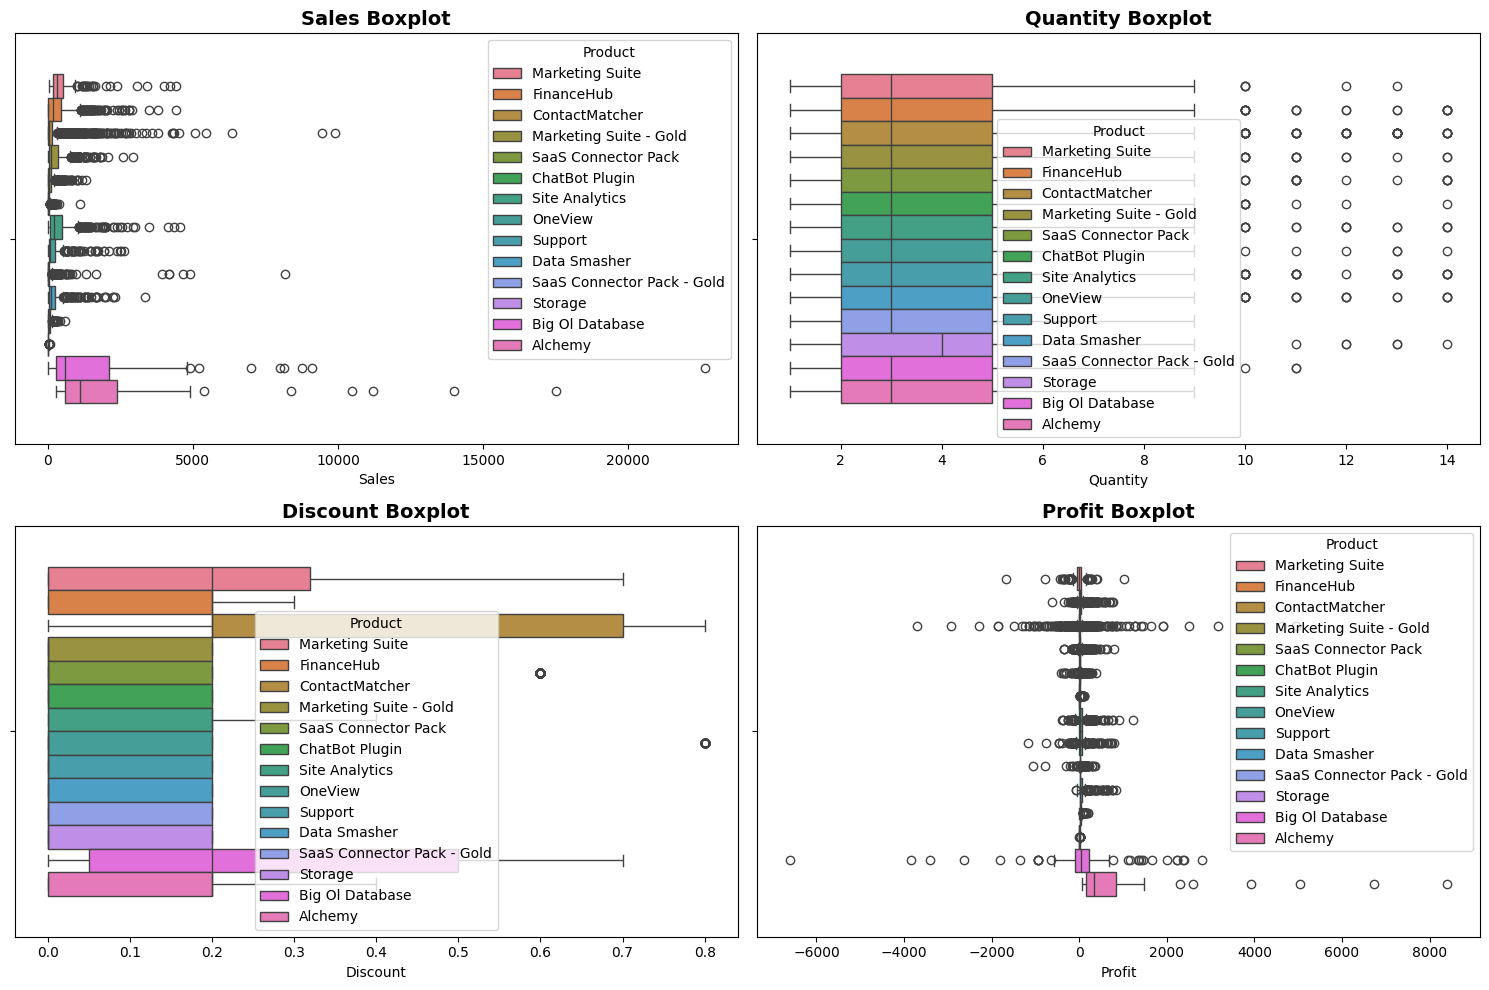

In [22]:
# Analyzing distribution of numerical data consist of Sales, Discount, Quantity, and Profit

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Sales Distribution
sns.boxplot(x= data_1_clean['Sales'], ax=axes[0, 0], hue= data_1_clean['Product'])
axes[0, 0].set_title('Sales Boxplot', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Quantity Distribution
sns.boxplot(x= data_1_clean['Quantity'], ax=axes[0, 1], hue= data_1_clean['Product'])
axes[0, 1].set_title('Quantity Boxplot', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Discount Distribution
sns.boxplot(x= data_1_clean['Discount'], ax=axes[1, 0], hue= data_1_clean['Product'])
axes[1, 0].set_title('Discount Boxplot', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Profit Distribution
sns.boxplot(x= data_1_clean['Profit'], ax=axes[1, 1], hue= data_1_clean['Product'])
axes[1, 1].set_title('Profit Boxplot', fontdict={'fontsize': 14, 'fontweight': 'bold'})

plt.tight_layout()
plt.show()

There are a lot of outliers in Sales and Profit, with each of the types included 11% and 18% of the data, however it is decided to be left there as there might be special cases or rare cases that we need to investigate later, so that we could fix the losses or justify the jump in profit.

- The contact matcher and Big Ol Database has a big outliers in the profit boxplot.
- Alchemy Product had a big positive outliers that can mean a good performance in the profit taking.

### Exporting the cleaned file to csv

In [23]:
data_1_clean.to_csv('SaaS-Sales-cleaned.csv')

# **3. Data Analysis**

- Creating Month and Year Columns for ease of analysis later.

In [24]:
data_1_clean['Year'] = data_1_clean['Order Date'].dt.strftime('%Y').astype(str)
data_1_clean['YearMonth'] = data_1_clean['Order Date'].dt.to_period('M')
data_1_clean['YearMonth'] = data_1_clean['YearMonth'].astype(str)
data_1_clean.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year,YearMonth
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,2022,2022-11
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022,2022-11
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022,2022-06
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021,2021-10
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,2021,2021-10


### **Data Distributions Checking**

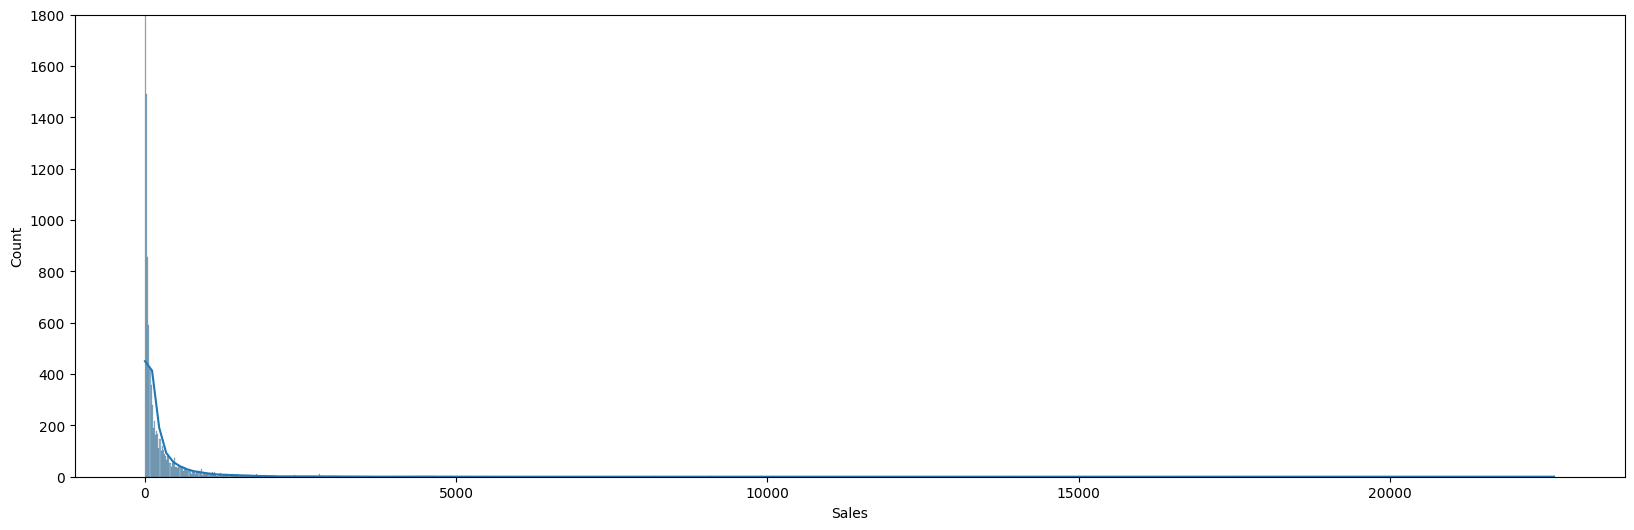

pvalue = 0.0, we reject Ho and conclude that Sales data is not normal


In [25]:
from scipy.stats import normaltest
# using D'Agostino as the data count is > 3000
a= 'Sales'

plt.figure(figsize= (20,6))
sns.histplot(data_1_clean, x = a, kde= True)
plt.ylim(0,1800)
plt.show()

statistic, pvalue = normaltest(data_1_clean[a])
if pvalue > 0.05:
    print(f'pvalue = {pvalue}, we do not reject Ho and conclude that {a} data is normal')
else:
    print(f'pvalue = {pvalue}, we reject Ho and conclude that {a} data is not normal')

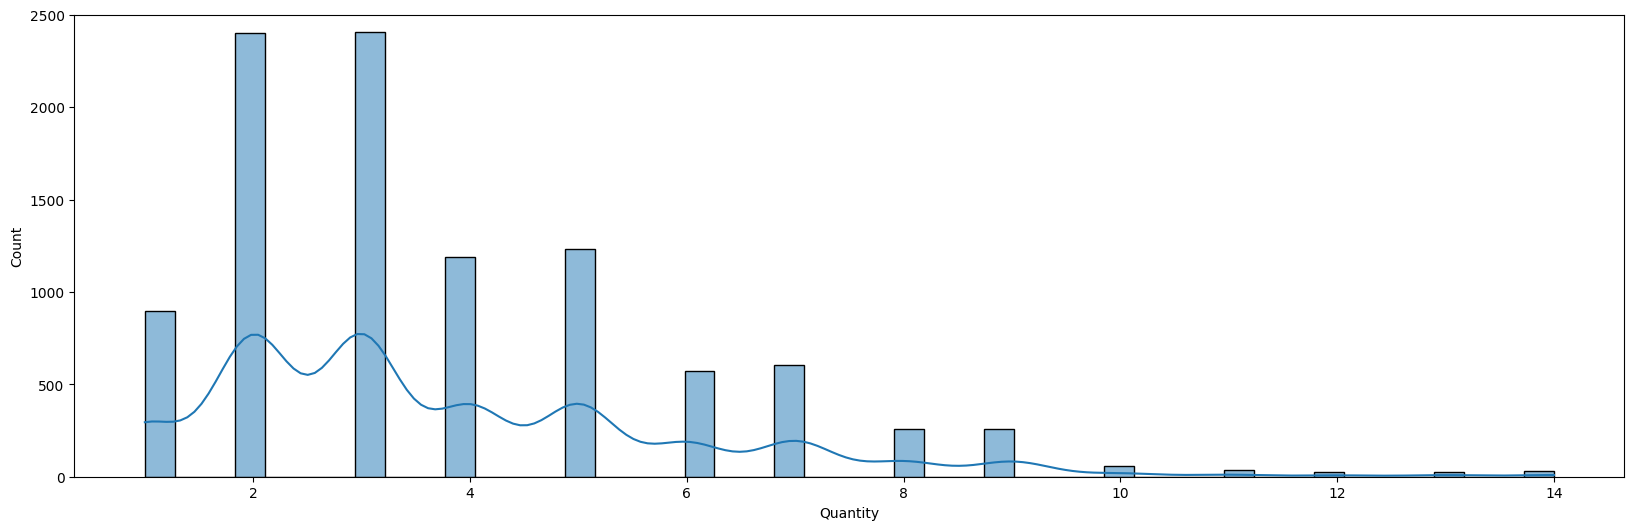

pvalue = 0.0, we reject Ho and conclude that Quantity data is not normal


In [26]:
a= 'Quantity'

plt.figure(figsize= (20,6))
sns.histplot(data_1_clean, x = a, kde= True)
plt.ylim(0,2500)
plt.show()

statistic, pvalue = normaltest(data_1_clean[a])
if pvalue > 0.05:
    print(f'pvalue = {pvalue}, we do not reject Ho and conclude that {a} data is normal')
else:
    print(f'pvalue = {pvalue}, we reject Ho and conclude that {a} data is not normal')

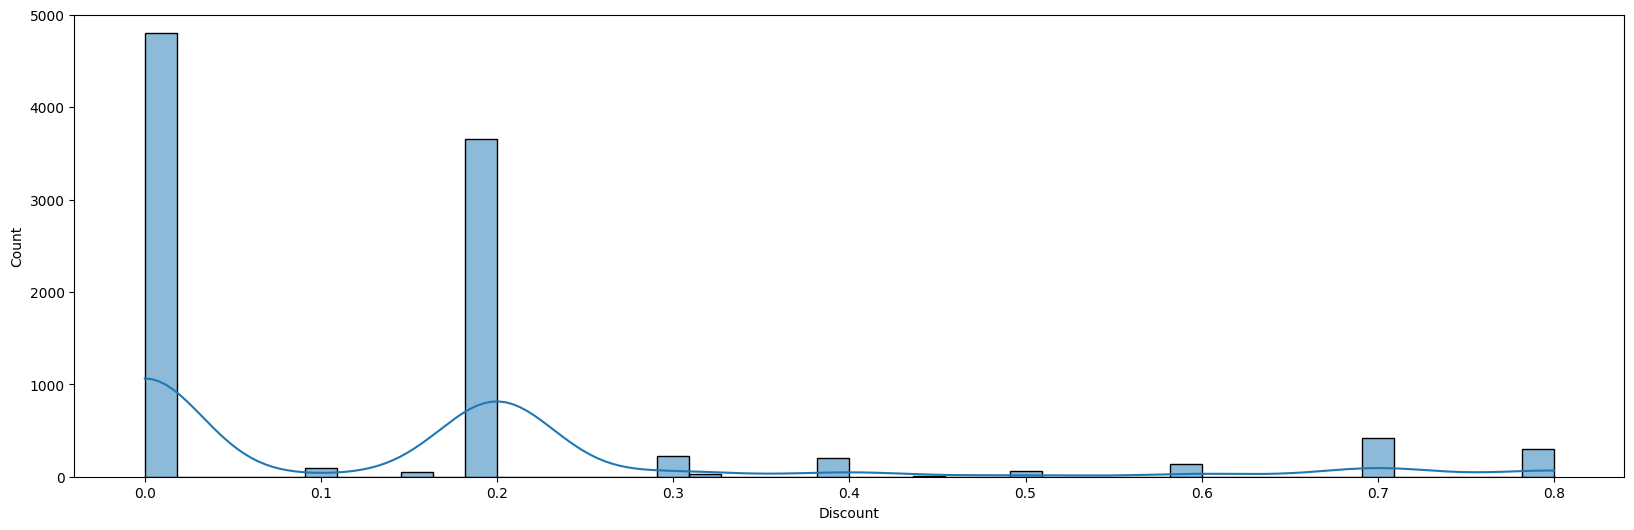

pvalue = 0.0, we reject Ho and conclude that Discount data is not normal


In [27]:
a= 'Discount'

plt.figure(figsize= (20,6))
sns.histplot(data_1_clean, x = a, kde= True)
plt.ylim(0,5000)
plt.show()

statistic, pvalue = normaltest(data_1_clean[a])
if pvalue > 0.05:
    print(f'pvalue = {pvalue}, we do not reject Ho and conclude that {a} data is normal')
else:
    print(f'pvalue = {pvalue}, we reject Ho and conclude that {a} data is not normal')

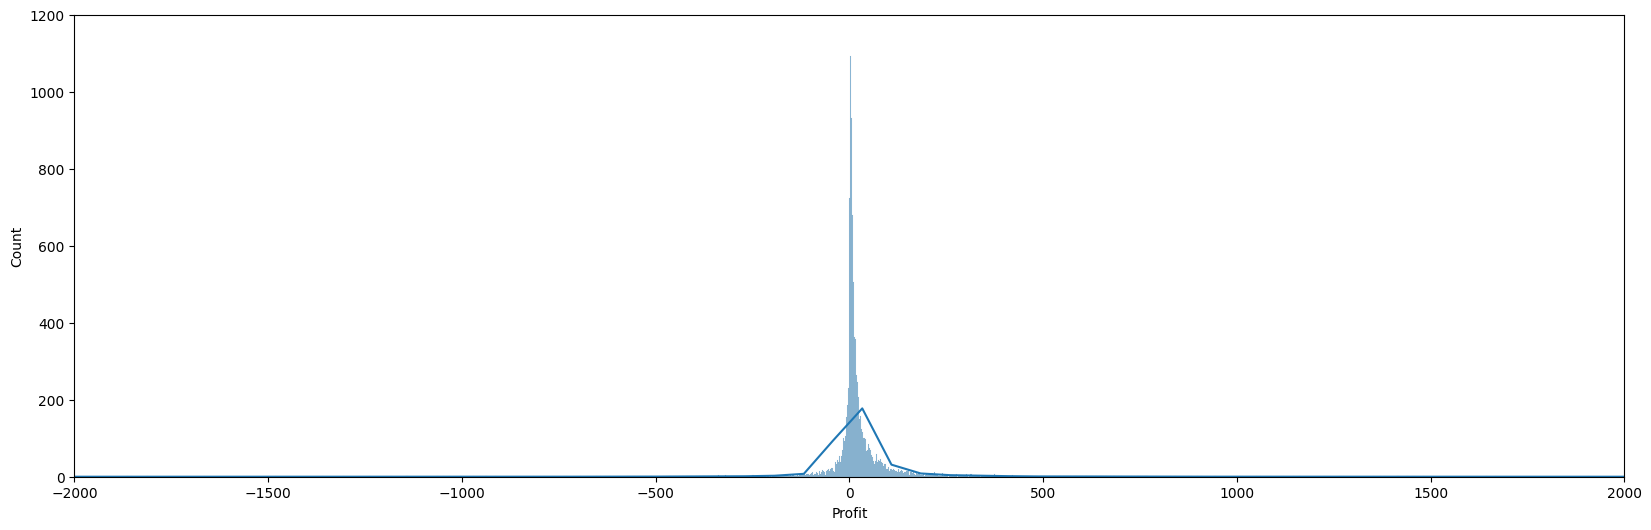

pvalue = 0.0, we reject Ho and conclude that Profit data is not normal


In [28]:
a= 'Profit'

plt.figure(figsize= (20,6))
sns.histplot(data_1_clean, x = a, kde= True)
plt.ylim(0,1200)
plt.xlim(-2000,2000)
plt.show()

statistic, pvalue = normaltest(data_1_clean[a])
if pvalue > 0.05:
    print(f'pvalue = {pvalue}, we do not reject Ho and conclude that {a} data is normal')
else:
    print(f'pvalue = {pvalue}, we reject Ho and conclude that {a} data is not normal')

- The Sales column has a very right skewed distribution so we cannot assume that it is normal, also the pvalue of the test pointed out the same conclusion.
- The quantity and discount columns are right skewed too and is fluctuating, so we cannot assume that they are normal, the pvalues of the tests also pointed out at the same conclusion.
- The profit is very leptokurtic, so we cannot assume that it is normal, the pvalue also gave out the same conclusion.
- As all of the numerical columns' distributions are not normal, then we opt to use median instead of the mean as it is much better estimator on where most of the data lies.

## **3.1. Sales and Profit Analysis**

### 3.1.1. Monthly and Yearly Sales Analysis

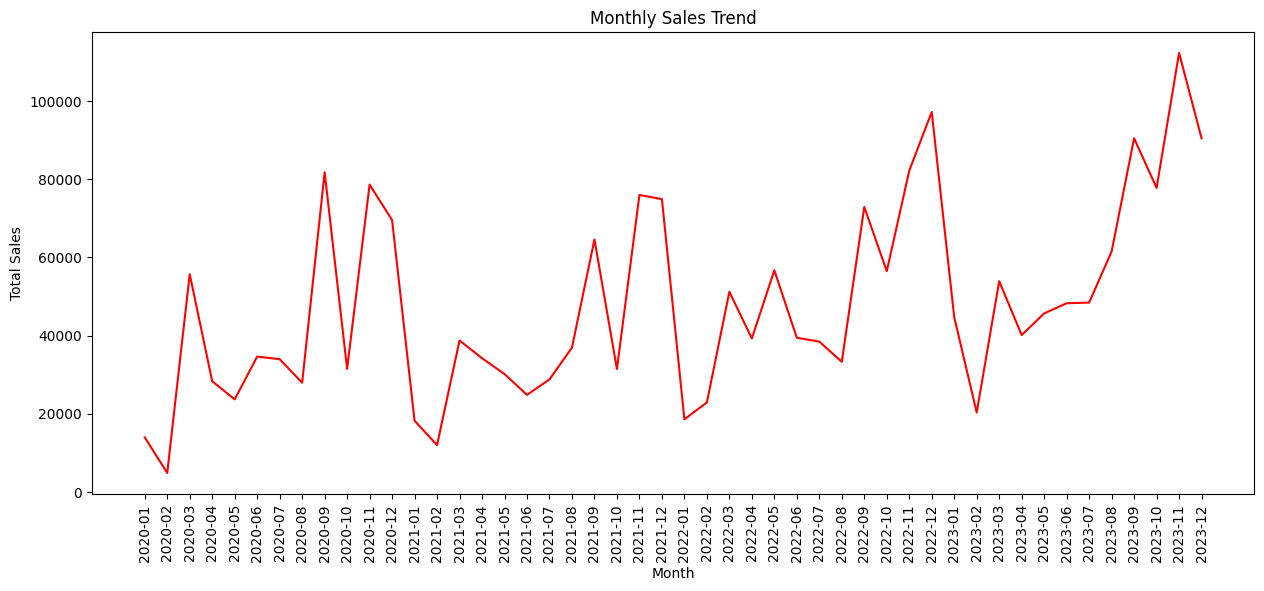

In [29]:
plt.figure(figsize= (15,6))
sales_monthly = data_1_clean.groupby(by= 'YearMonth')[['Sales']].sum()
sns.lineplot(sales_monthly, x= 'YearMonth', y= 'Sales', color= 'red')

plt.xticks(rotation = (90))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

- The monthly sales data had a seasonality, however it tended to have an upward trend, this could be seen on the graph below of yearly sales trend.
- The sales tended to peak on November and December of the Year, and had its lowest point on February.

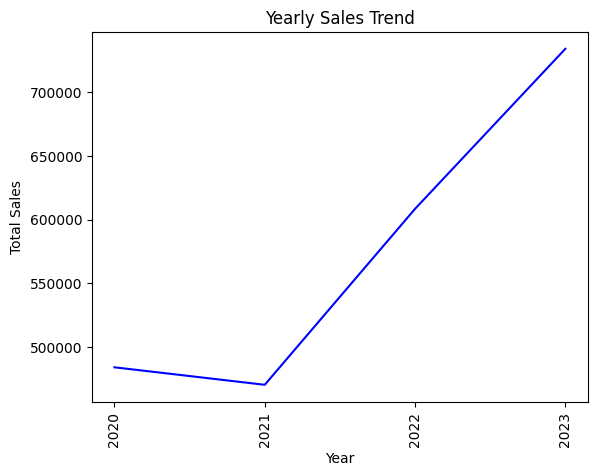

In [30]:
# plt.figure(figsize= (15,6))
sales_monthly = data_1_clean.groupby(by= 'Year')[['Sales']].sum()
sns.lineplot(sales_monthly, x= 'Year', y= 'Sales', color= 'blue')

plt.xticks(rotation = (90))
plt.title('Yearly Sales Trend')
plt.ylabel('Total Sales')
plt.show()

- The sales had an upward trend after a dip in 2021.

### 3.1.2. Sales and Profit Analysis by Products

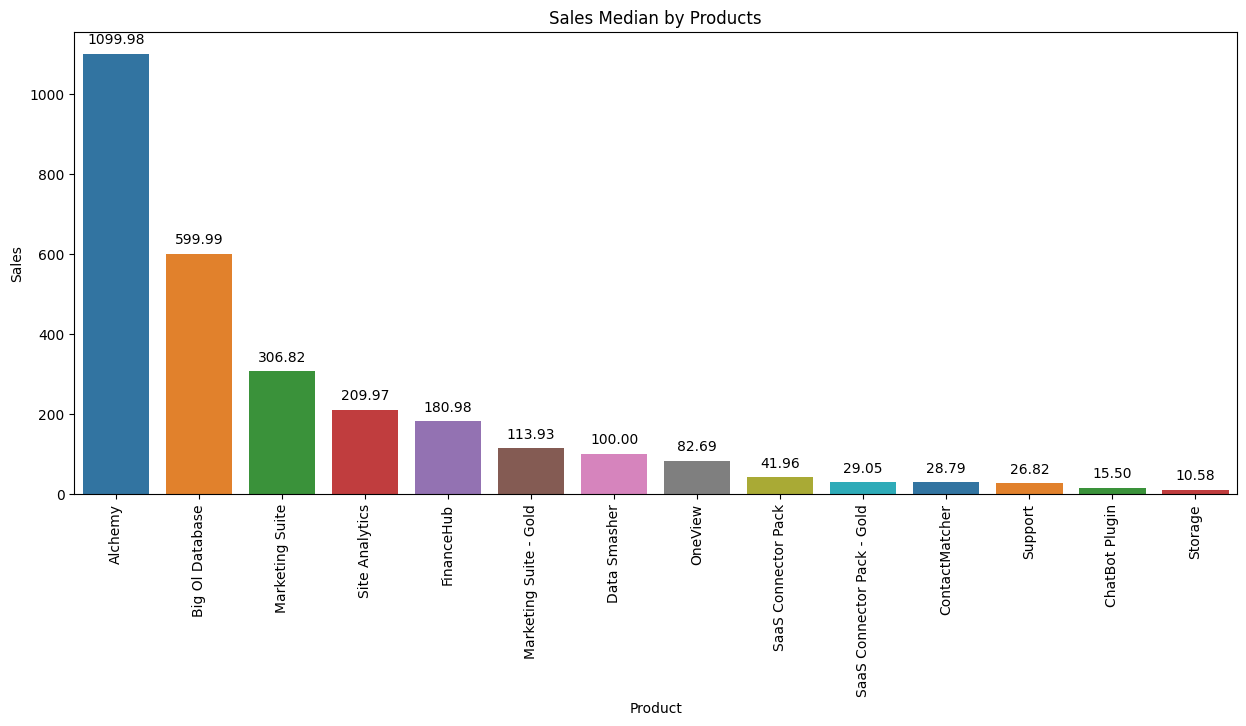

In [31]:
df_sales = data_1_clean.groupby(by = 'Product')[['Sales']].median().sort_values(by = 'Sales', ascending= False)

plt.figure(figsize= (15,6))
ax = sns.barplot(df_sales, x= 'Product', y= 'Sales', palette= 'tab10', ci= 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation = (90))
plt.title('Sales Median by Products')
plt.show()

- It could be seen that alchemy and Big Ol Database contributed a lot in the sales of the SaaS, this could be because there were big range as we see from the outliers analysis.
- While Chatbot Plugin and Storage had the lowest number of sales.

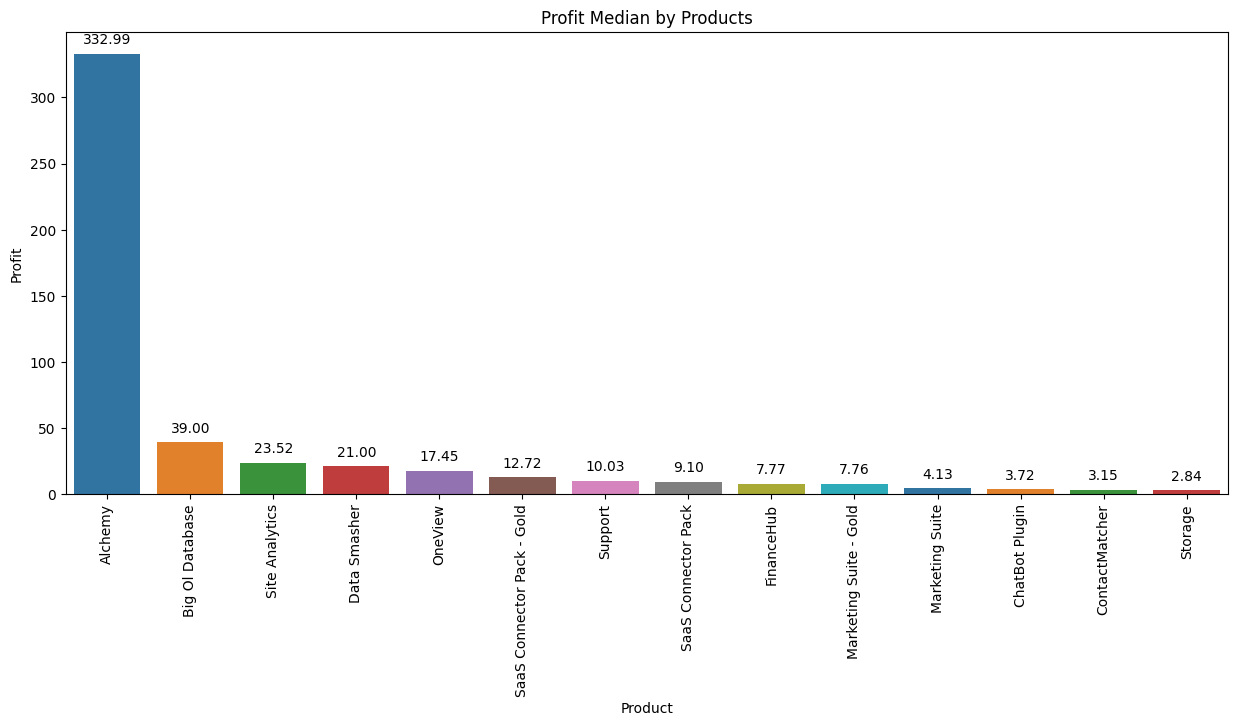

In [32]:
df_sales = data_1_clean.groupby(by = 'Product')[['Profit']].median().sort_values(by = 'Profit', ascending= False)

plt.figure(figsize= (15,6))
ax = sns.barplot(df_sales, x= 'Product', y= 'Profit', palette= 'tab10', ci= 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation = (90))
plt.title('Profit Median by Products')
plt.show()

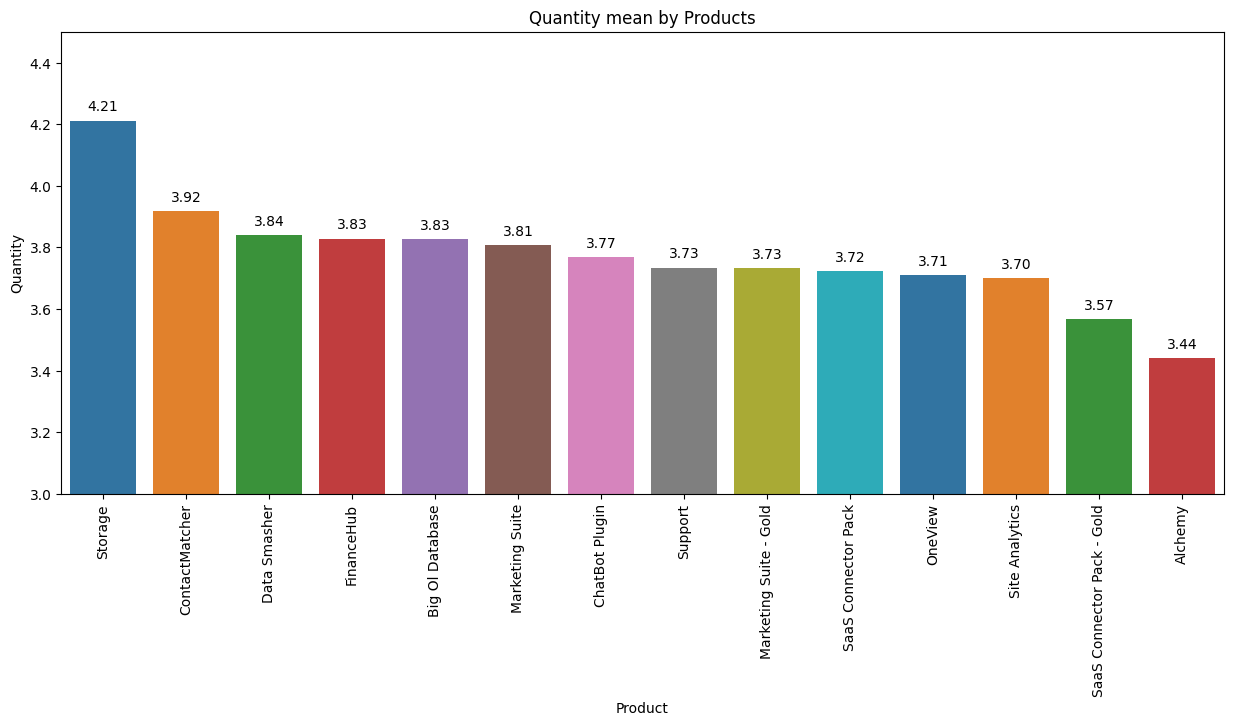

In [33]:
df_sales = data_1_clean.groupby(by = 'Product')[['Quantity']].mean().sort_values(by = 'Quantity', ascending= False)

plt.figure(figsize= (15,6))
ax = sns.barplot(df_sales, x= 'Product', y= 'Quantity', palette= 'tab10', ci= 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation = (90))
plt.ylim(3,4.5)
plt.title('Quantity mean by Products')
plt.show()

- Eventhough storage has bigger mean on quantity, however it is the lowest in the sales, this maybe due to the low price in the storage.
- On the other hand, Alchemy has the lowest mean in quantity but contributed tha biggest in sales and profit.
- We use mean in this quantity analysis because the median cannot show the exact number.

In [34]:
data_1_clean['Profit Ratio'] = data_1_clean['Profit'] / data_1_clean['Sales'] * 100
data_1_clean.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year,YearMonth,Profit Ratio
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,2022,2022-11,16.00
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022,2022-11,30.00
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022,2022-06,47.00
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021,2021-10,-40.00
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,2021,2021-10,11.25


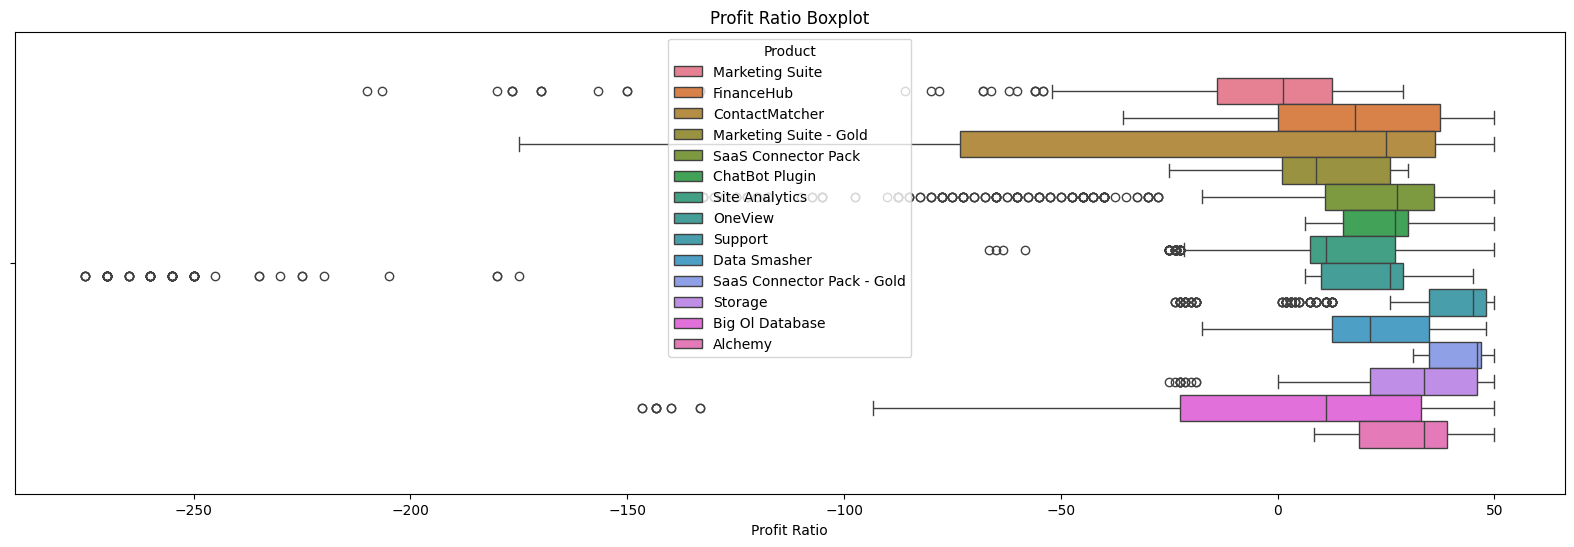

In [35]:
plt.figure(figsize= (20,6))
plt.title('Profit Ratio Boxplot')
sns.boxplot(data_1_clean,x= 'Profit Ratio', hue= 'Product')
plt.show()

- From the Profit Ratio boxplot, we could see there are some products that contributed to the losses significantly, such as Marketing Suite, SaaS Connector Pack, Support and Data smasher.
- However we need to see the sum of the profit as this boxplot is not enough to see the data as it could have more than 0 profit ratio, but the outliers are little compared to the whole data.

In [36]:
profit_product= data_1_clean.groupby(by= 'Product')[['Profit']].sum().sort_values(by='Profit',ascending= False)
profit_product

,Profit
Product,
Alchemy,55617.8249
Site Analytics,44515.7306
Data Smasher,41936.6357
Support,32864.4698
FinanceHub,32136.4203
Marketing Suite - Gold,21278.8264
OneView,18138.0054
SaaS Connector Pack,13059.1436
ContactMatcher,12496.2822


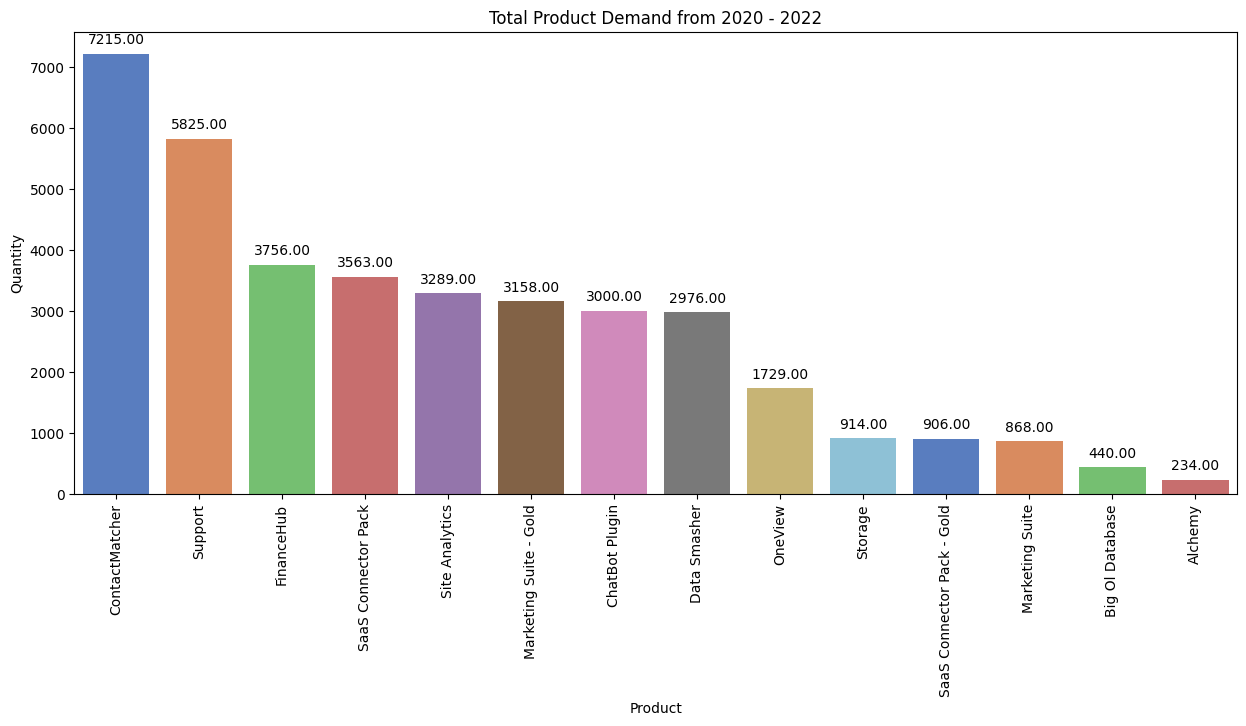

In [37]:
plt.figure(figsize=(15,6))
ax= sns.barplot(data_1_clean.groupby(by= 'Product')[['Quantity']].sum().sort_values(by= 'Quantity', ascending= False), x='Product', y= 'Quantity', palette= 'muted')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation = (90))
plt.title('Total Product Demand from 2020 - 2022')
plt.show()

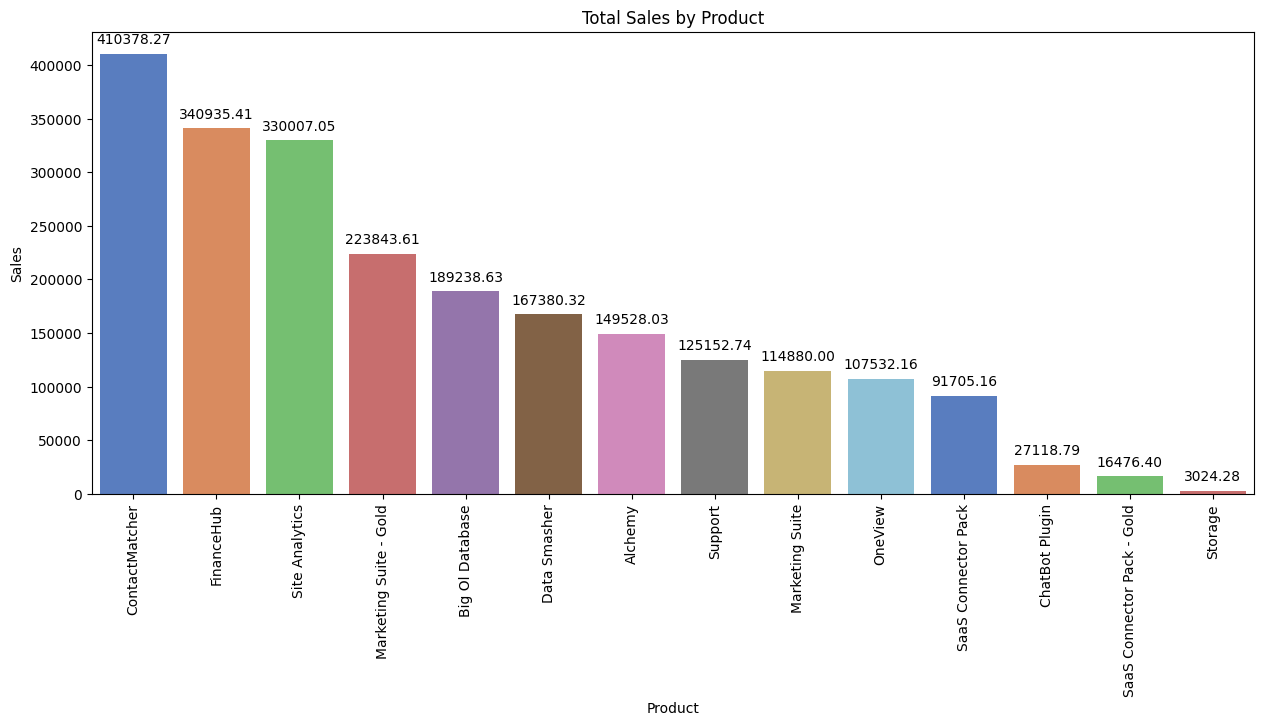

In [38]:
plt.figure(figsize=(15,6))
ax= sns.barplot(data_1_clean.groupby(by= 'Product')[['Sales']].sum().sort_values(by= 'Sales', ascending= False), x='Product', y= 'Sales', palette= 'muted')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation = (90))
plt.title('Total Sales by Product')
plt.show()

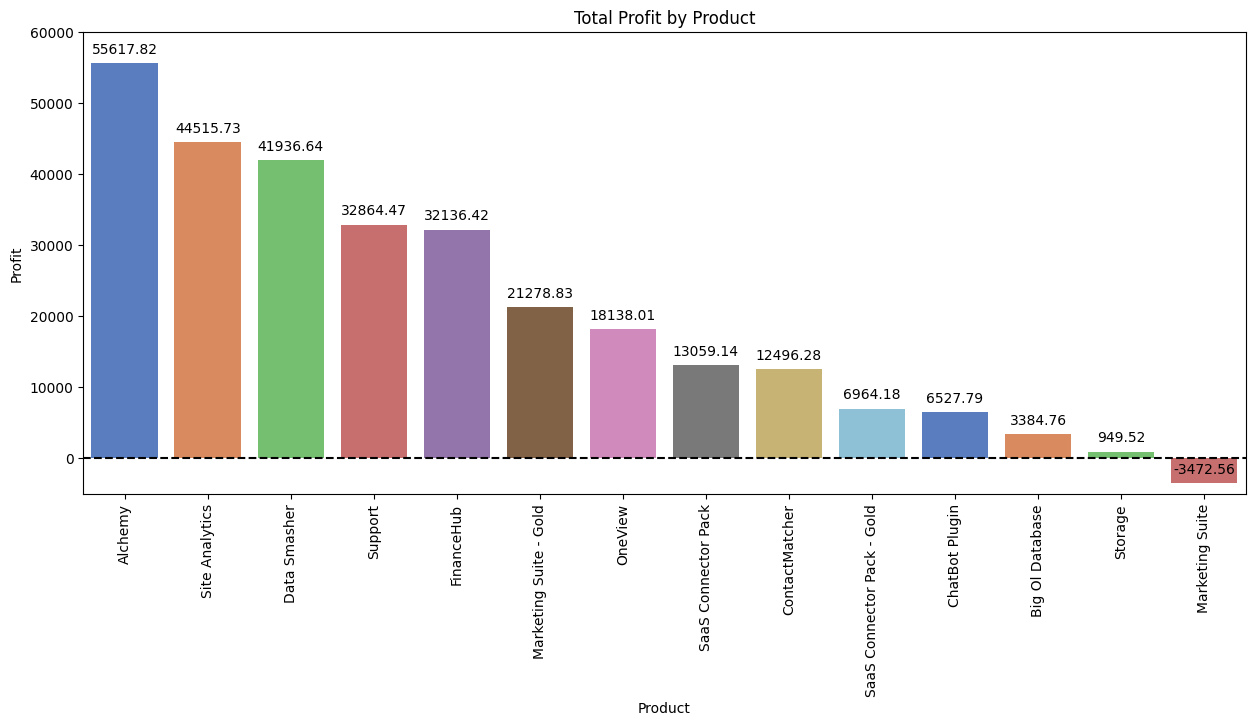

In [39]:
plt.figure(figsize=(15,6))
ax= sns.barplot(profit_product, x='Product', y= 'Profit', palette= 'muted')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
ax.axhline(y=0, color='black', linestyle='--', label='Zero Profit')
plt.xticks(rotation = (90))
plt.title('Total Profit by Product')
plt.ylim(-5e3, 6e4)
plt.show()

- From this total profit by Product, we can see that from year 2020 to 2022, Alchemy and Site Analytics had the highest number of profit.
- Marketing Suite had losses instead of profit eventhough the median profit of Marketing Suite is positive. 

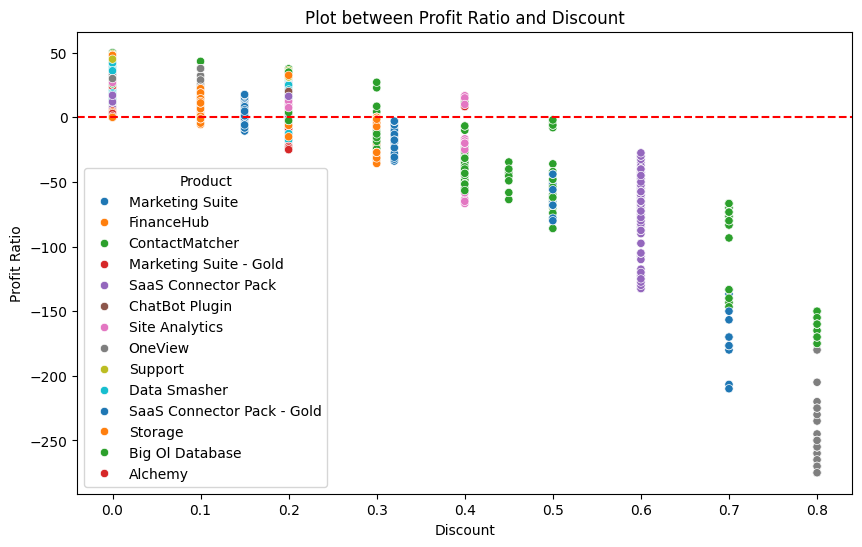

In [40]:
plt.figure(figsize= (10,6))
ax = sns.scatterplot(data_1_clean, x= 'Discount', y= 'Profit Ratio', hue= 'Product', palette= 'tab10')
ax.axhline(y=0, color='red', linestyle='--', label='Zero Profit')
plt.title('Plot between Profit Ratio and Discount')
plt.show()

- The bigger the discount, the lower the profit ratio will be, and also starting from 40% discount, the profit ratio is negative.

<Axes: >

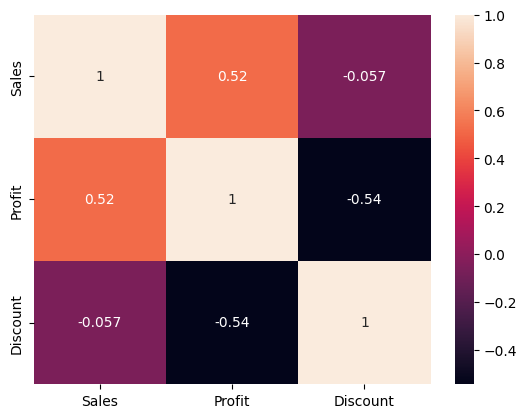

In [41]:
sns.heatmap(data_1_clean[['Sales', 'Profit', 'Discount']].corr(method= 'spearman'), annot= True)

- Discount and Sales had a very weak relationship of (-0.057), so we could say that changes between the two will not affect the others.
- Meanwhile, profit and discount had a medium inverse relationship, in which profit will decrease as discount increase.
- Lastly, Profit and Sales had a positive medium correlation.

# **3.2. Customer Analysis**

In [42]:
customer_profit = data_1_clean.groupby(by= ['Customer ID', 'Customer'])[['Sales']].sum().sort_values(by= 'Sales', ascending= False)
customer_profit

,,Sales
Customer ID,Customer,
1029,Anthem,55719.2100
1009,Ford Motor,43893.0424
1080,Allianz,42904.1670
1011,Bank of America Corp.,41255.9471
1093,Valero Energy,41220.4188
...,...,...
1059,Tesco,8173.2260
1012,Berkshire Hathaway,7100.9290
1079,Safeway,6633.1370


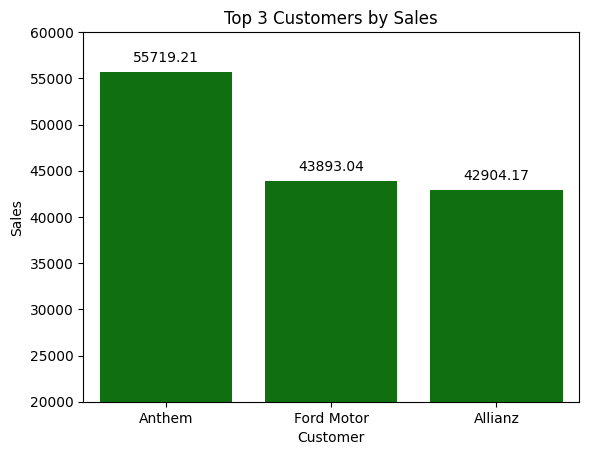

In [43]:
ax= sns.barplot(customer_profit.iloc[0:3], x= 'Customer', y= 'Sales', color= 'green')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylim(2e4,6e4)
plt.title('Top 3 Customers by Sales')
plt.show()

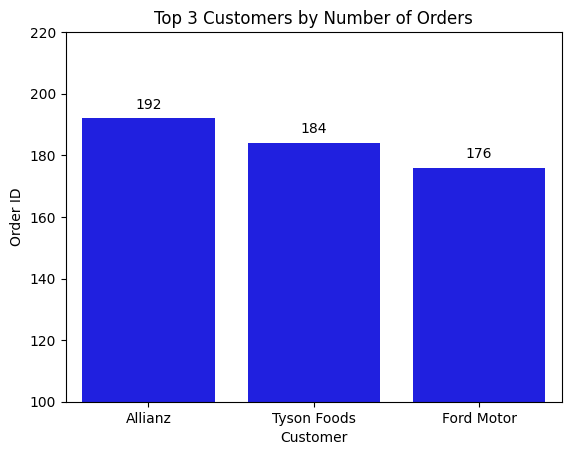

In [44]:
customer_count = data_1_clean.groupby(by= ['Customer ID', 'Customer'])[['Order ID']].count().sort_values(by= 'Order ID', ascending= False)
ax= sns.barplot(customer_count.iloc[0:3], x= 'Customer', y= 'Order ID', color= 'blue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylim(100, 220)
plt.title('Top 3 Customers by Number of Orders')
plt.show()

- Allianz and Ford Motors appeared twice in both the biggest sales and most order sold.

In [45]:
customer_product_sales = data_1_clean[data_1_clean['Customer'] == 'Allianz'].groupby(by= ['Customer', 'Product'])[['Sales']].sum().reset_index().sort_values(by=['Customer', 'Sales'], ascending= False)
customer_product_sales

,Customer,Product,Sales
4,Allianz,FinanceHub,9654.954
2,Allianz,ContactMatcher,7835.781
12,Allianz,Support,6378.058
10,Allianz,Site Analytics,5980.952
6,Allianz,Marketing Suite - Gold,4829.464
3,Allianz,Data Smasher,1967.558
8,Allianz,SaaS Connector Pack,1507.226
5,Allianz,Marketing Suite,1444.504
0,Allianz,Alchemy,1079.976
9,Allianz,SaaS Connector Pack - Gold,1079.452


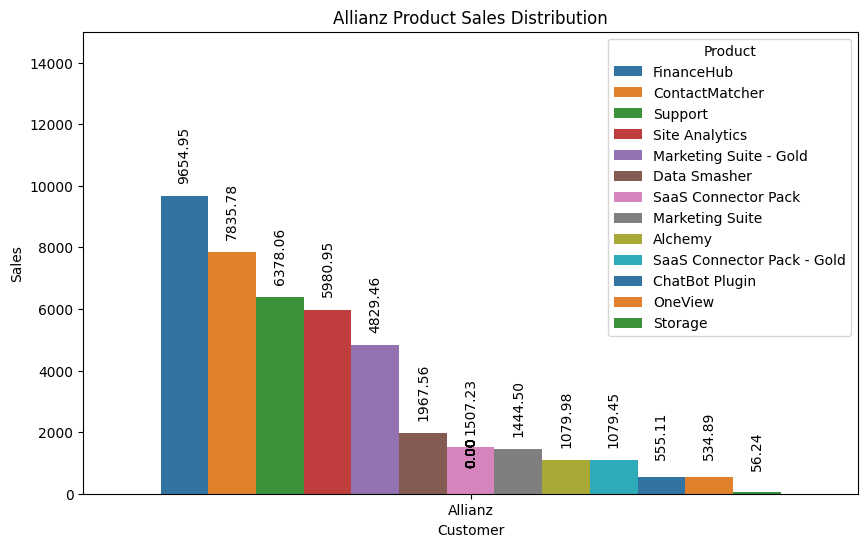

In [46]:
plt.figure(figsize=(10,6))
ax= sns.barplot(customer_product_sales, x= 'Customer', y= 'Sales', hue= 'Product', palette= 'tab10')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 30), textcoords='offset points', rotation= (90))
plt.ylim(0,15e3)
plt.title('Allianz Product Sales Distribution')
plt.show()

In [47]:
customer_product_sales = data_1_clean[data_1_clean['Customer'] == 'Ford Motor'].groupby(by= ['Customer', 'Product'])[['Sales']].sum().reset_index().sort_values(by=['Customer', 'Sales'], ascending= False)
customer_product_sales

,Customer,Product,Sales
3,Ford Motor,ContactMatcher,11335.4040
11,Ford Motor,Site Analytics,5853.3100
1,Ford Motor,Big Ol Database,5637.5840
5,Ford Motor,FinanceHub,5506.8440
7,Ford Motor,Marketing Suite - Gold,4806.6720
13,Ford Motor,Support,2841.3820
0,Ford Motor,Alchemy,2799.9500
4,Ford Motor,Data Smasher,1500.9580
8,Ford Motor,OneView,1239.3580
9,Ford Motor,SaaS Connector Pack,784.5600


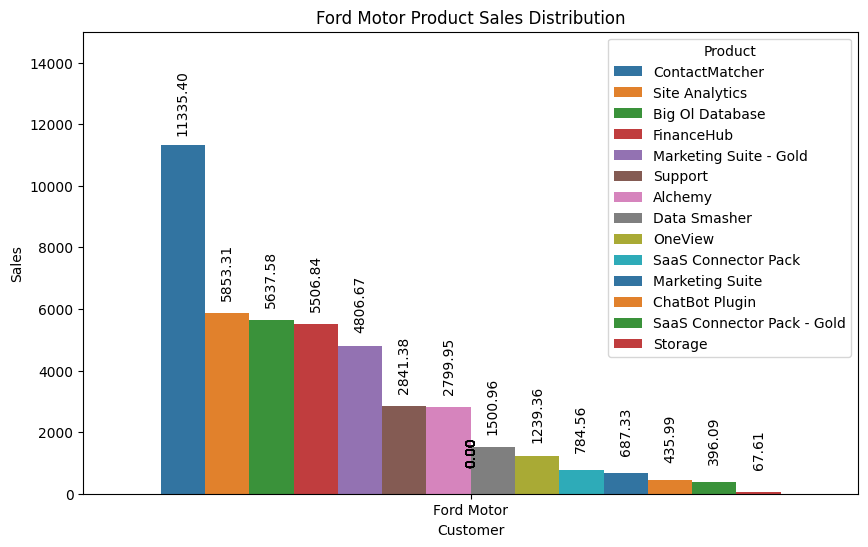

In [48]:
plt.figure(figsize=(10,6))
ax= sns.barplot(customer_product_sales, x= 'Customer', y= 'Sales', hue= 'Product', palette= 'tab10')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 30), textcoords='offset points', rotation= (90))
plt.ylim(0,15e3)
plt.title('Ford Motor Product Sales Distribution')
plt.show()

In [49]:
data_1_clean[data_1_clean['Customer'] == 'Allianz'].groupby(by= 'Product')[['Sales']].sum().sort_values(by= 'Sales', ascending= False).iloc[0:3]

,Sales
Product,
FinanceHub,9654.954
ContactMatcher,7835.781
Support,6378.058


In [50]:
data_1_clean[data_1_clean['Customer'] == 'Ford Motor'].groupby(by= 'Product')[['Sales']].sum().sort_values(by= 'Sales', ascending= False).iloc[0:3]

,Sales
Product,
ContactMatcher,11335.404
Site Analytics,5853.310
Big Ol Database,5637.584


- One of the products that exist in the top 3 for both company (Allianz and Ford Motors), ContactMatcher shows up on both. This means that the product is used at top companies and is a big demand for both.

In [51]:
data_1_clean.groupby(by= 'Segment')[['Sales']].sum()

,Sales
Segment,
Enterprise,4.296531e+05
SMB,1.161401e+06
Strategic,7.061464e+05


In [52]:
sales_industry = data_1_clean.groupby(by= 'Industry')[['Sales']].sum().sort_values(by= 'Sales', ascending= False)
sales_industry

,Sales
Industry,
Finance,474150.4844
Energy,304644.1409
Manufacturing,295192.3812
Healthcare,273183.2882
Tech,263169.0277
Consumer Products,224044.1422
Retail,223072.0720
Communications,120962.2365
Transportation,90191.3276


<function matplotlib.pyplot.show(close=None, block=None)>

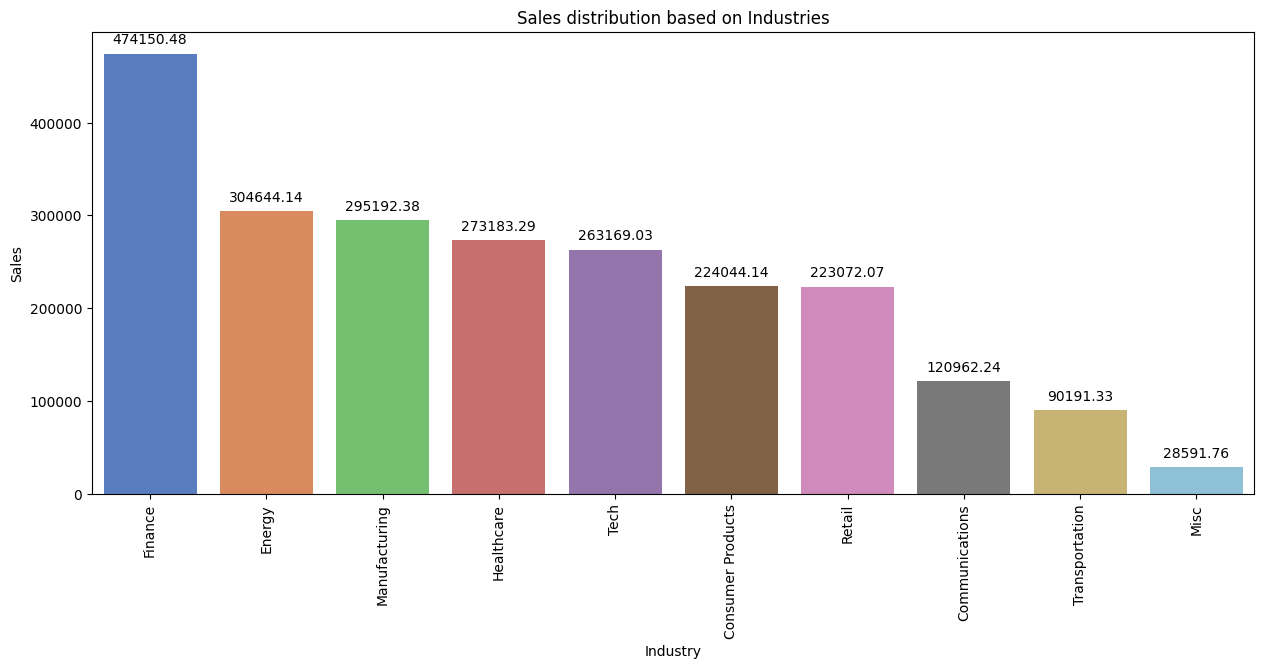

In [53]:
plt.figure(figsize=(15,6))
ax = sns.barplot(sales_industry, x='Industry', y= 'Sales', palette= 'muted')
plt.title('Sales distribution based on Industries')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation = (90))
plt.show

- Finance, Energy and Manufacturing are the 3 biggest industries that AWS provided their services for.

In [54]:
industry_product_sales = data_1_clean[data_1_clean['Industry'].isin(['Finance', 'Energy', 'Manufacturing'])].groupby(by= ['Industry', 'Product'])[['Sales']].sum().reset_index().sort_values(by= ['Industry', 'Sales'], ascending= [True, False])
industry_product_sales

,Industry,Product,Sales
3,Energy,ContactMatcher,60726.8295
11,Energy,Site Analytics,56183.4240
5,Energy,FinanceHub,39122.4980
7,Energy,Marketing Suite - Gold,32983.8980
1,Energy,Big Ol Database,27991.3470
4,Energy,Data Smasher,22306.2060
6,Energy,Marketing Suite,16754.6244
13,Energy,Support,14348.2000
8,Energy,OneView,13145.0180
9,Energy,SaaS Connector Pack,8693.9760


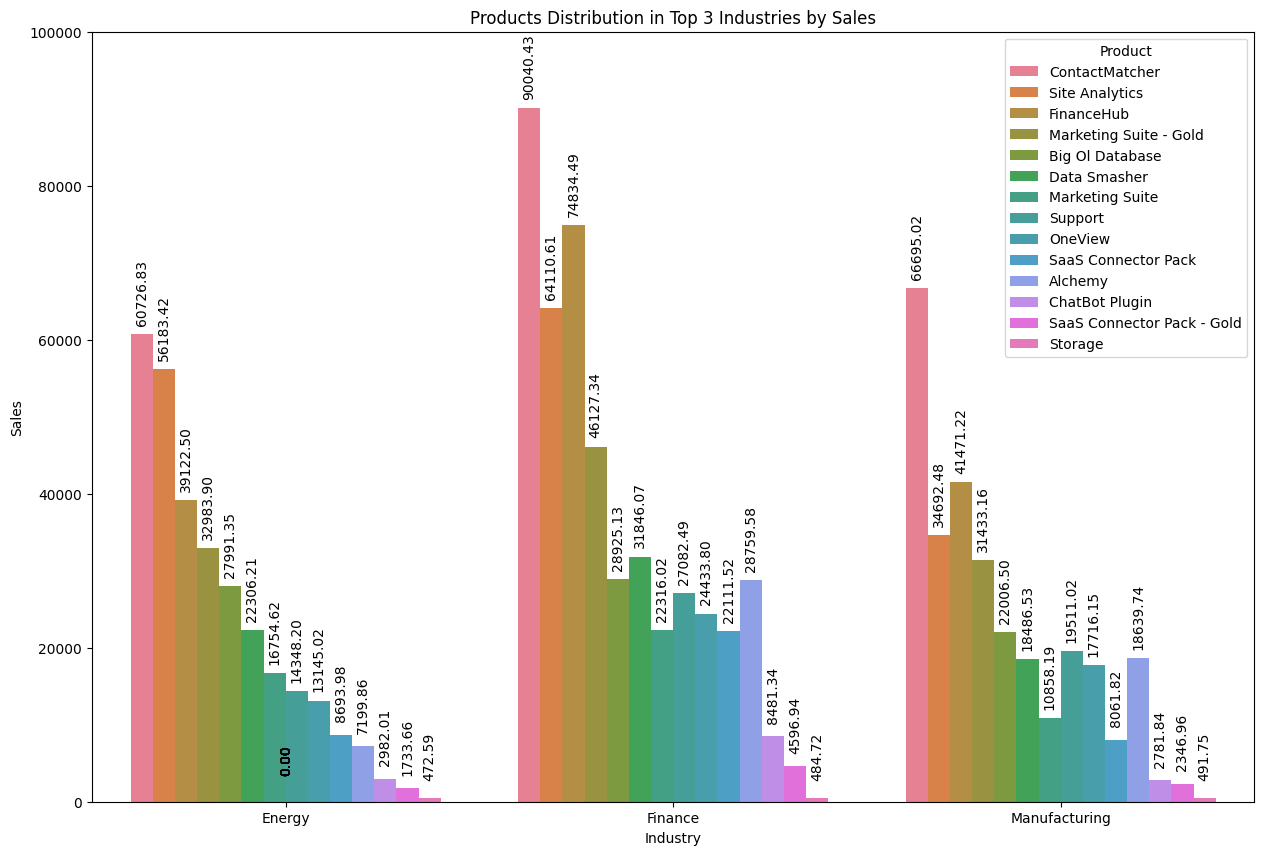

In [55]:
plt.figure(figsize=(15,10))
ax= sns.barplot(industry_product_sales, x= 'Industry', y= 'Sales', hue= 'Product')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 30), textcoords='offset points', rotation= (90))
plt.ylim(0,1e5)
plt.title('Products Distribution in Top 3 Industries by Sales')
plt.show()

- We could see from the table that the three most sold products to these 3 industries are ContactMatcher, FinanceHub, and Site Analytics.

# 3. **Geographical Analysis**

In [56]:
country_sales = data_1_clean.groupby(by= 'Country')[['Sales']].sum().sort_values(by= 'Sales', ascending= False)
country_sales

,Sales
Country,
United States,457687.6315
United Kingdom,313169.8810
Japan,170188.0458
Canada,138641.2700
France,116511.9140
Germany,89473.7080
Australia,80166.1010
Mexico,78258.1360
Brazil,76269.6140


In [57]:
top_countries = list(country_sales.nlargest(5, columns= 'Sales').index)
top_countries
country_sales = country_sales.reset_index()
country_sales['Country Group'] = country_sales['Country'].apply(lambda i: i if i in top_countries else 'Others')
country_sales

,Country,Sales,Country Group
0,United States,457687.6315,United States
1,United Kingdom,313169.8810,United Kingdom
2,Japan,170188.0458,Japan
3,Canada,138641.2700,Canada
4,France,116511.9140,France
5,Germany,89473.7080,Others
6,Australia,80166.1010,Others
7,Mexico,78258.1360,Others
8,Brazil,76269.6140,Others
9,Spain,70636.7200,Others


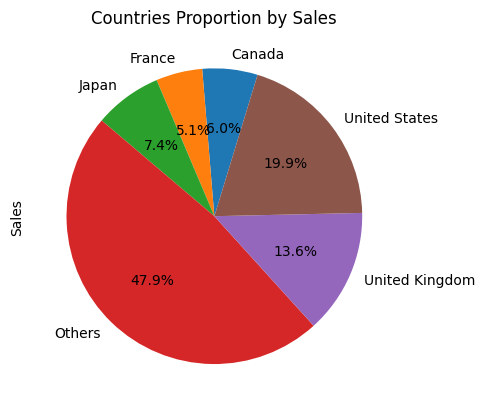

In [58]:
country_sales.groupby(by= 'Country Group')[['Sales']].sum().plot(kind= 'pie', y= 'Sales', legend= False, autopct= '%1.1f%%', startangle = (73))
plt.title('Countries Proportion by Sales')
plt.show()

In [59]:
print('Bottom 3 countries based on sales:')
data_1_clean.groupby(by= 'Country')[['Sales']].sum().sort_values(by= 'Sales', ascending= True).iloc[0:3]

Bottom 3 countries based on sales:


,Sales
Country,
Qatar,919.910
Iceland,1209.824
Denmark,1270.530


In [60]:
country_product = data_1_clean[data_1_clean['Country'].isin(['United States', 'United Kingdom', 'Japan'])].groupby(by= ['Country', 'Product'])[['Sales']].sum().reset_index().sort_values(by= ['Country', 'Sales'], ascending= [True, False])
country_product

,Country,Product,Sales
11,Japan,Site Analytics,28589.5680
5,Japan,FinanceHub,27156.0480
3,Japan,ContactMatcher,24803.3370
1,Japan,Big Ol Database,19546.2240
7,Japan,Marketing Suite - Gold,15723.5840
6,Japan,Marketing Suite,14493.4588
13,Japan,Support,11500.2160
4,Japan,Data Smasher,11328.5600
0,Japan,Alchemy,5639.8720
9,Japan,SaaS Connector Pack,3766.7240


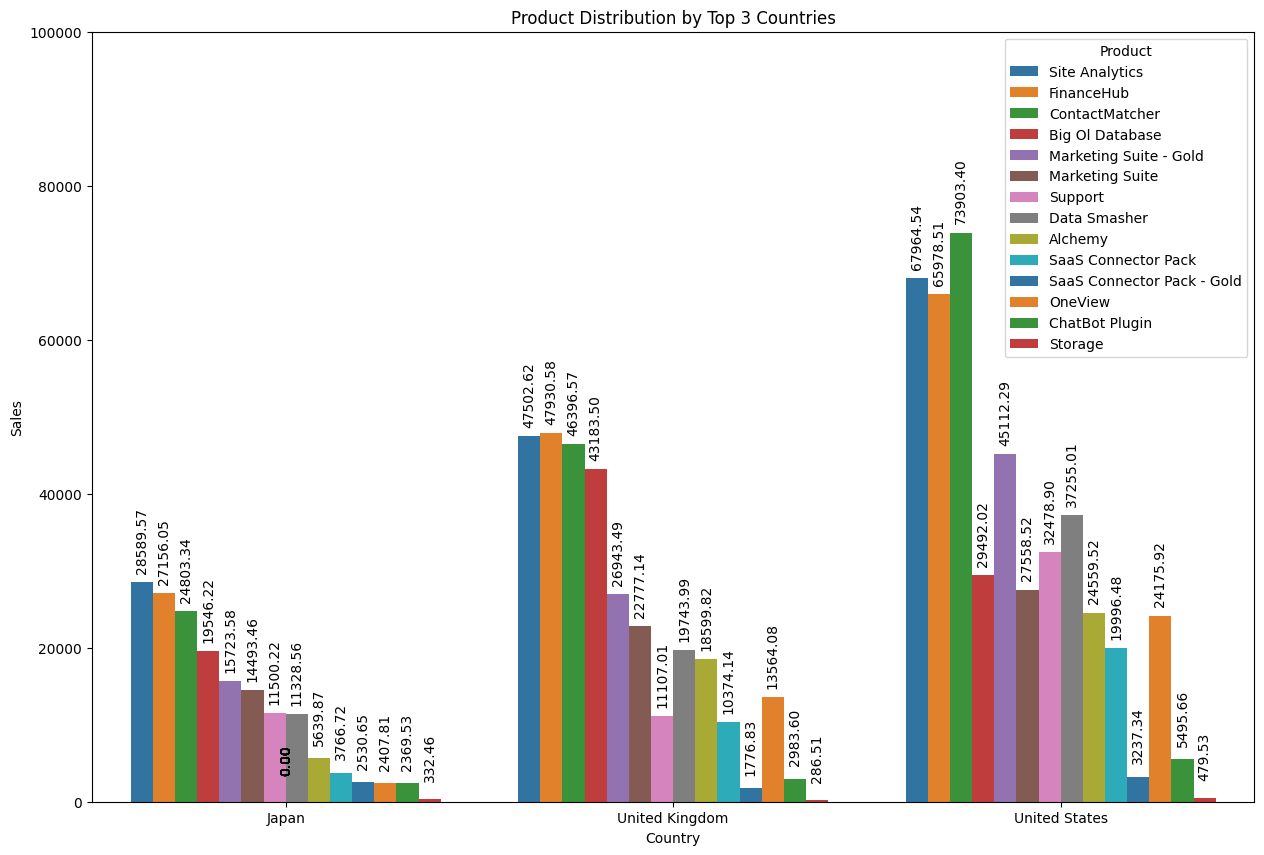

In [61]:
plt.figure(figsize= (15,10))
ax= sns.barplot(country_product, x= 'Country', y= 'Sales', hue= 'Product', palette= 'tab10')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 30), textcoords='offset points', rotation= (90))
plt.ylim(0,1e5)
plt.title('Product Distribution by Top 3 Countries')
plt.show()

In [62]:
for i in country_product['Country'].unique():
    print(f'Top 3 Products in {i}:')
    print(country_product[country_product['Country'] == i][['Product', 'Sales']].iloc[0:3])
    print()


Top 3 Products in Japan:
           Product      Sales
11  Site Analytics  28589.568
5       FinanceHub  27156.048
3   ContactMatcher  24803.337

Top 3 Products in United Kingdom:
           Product      Sales
19      FinanceHub  47930.577
25  Site Analytics  47502.620
17  ContactMatcher  46396.570

Top 3 Products in United States:
           Product      Sales
31  ContactMatcher  73903.400
39  Site Analytics  67964.536
33      FinanceHub  65978.508



- All 3 countries have Site Analytics, FinanceHub and ContactMatcher as their top liner.

In [63]:
for i in country_product['Country'].unique():
    print(f'Bottom 3 Products in {i}:')
    print(country_product[country_product['Country'] == i].sort_values(by=['Country', 'Sales'], ascending= [True, True])[['Product', 'Sales']].iloc[0:3])
    print()


Bottom 3 Products in Japan:
           Product     Sales
12         Storage   332.464
2   ChatBot Plugin  2369.528
8          OneView  2407.814

Bottom 3 Products in United Kingdom:
                       Product    Sales
26                     Storage   286.51
24  SaaS Connector Pack - Gold  1776.83
16              ChatBot Plugin  2983.60

Bottom 3 Products in United States:
                       Product    Sales
40                     Storage   479.53
38  SaaS Connector Pack - Gold  3237.34
30              ChatBot Plugin  5495.66



# **4. Conclusion and Recommendation**

## **4.1. Conclusion**

**1. Monthly and Yearly Sales Analysis**
- Monthly Sales had fluctuations and seasonality, however, it had an upward trend overall, in which it peaked during the December month of the year, and bottomed on every February.
- In 2021, the sales had a dip before continuing its increasing trend by 2022 and 2023.

**2. Product Analysis**
- The top 3 products are ContactMatcher, FinanceHub and Site Analytics, in which they dominate the top sales overall, by customers(companies), and by countries.
- Alchemy, Site Analytics and DataSmasher is the top 3 profit contributor.
- Marketing Suites had a loss in total profit from 2020 to 2022 by $3,472.56. This might due to huge discount in the process of sales.

**3. Customer Analysis**
- Allianz and Ford Motors showed up as the biggest customers with sales and order number always being in the top 3.
- Allianz, Ford Motors and Anthem contributed as the companies with biggest sales that used our companies service.
- Allianz, Ford Motors and Tyson Foods are the most loyals with the biggest number of orders.

**4. Industry Analysis**
- The top industries that AWS served were Energy, Finance and Manufacturing.
- Products used in the top industries were mostly ContactMatcher, FinanceHub and Site Analytics.

**5. Geographical Analysis**
- The top countries that the company had the biggest contribution to are United States, United Kingdom and Japan.
- Products used in the top countries were mostly the same with industries, which are ContactMatcher, FinanceHub and Site Analytics.
- Qatar, Iceland, and Denmark had the lowest contribution to the sales of the company.

## **4.2 Recommendation**

### 1. Repricing:
- As we can see, the Marketing Suite product is having a losses, a repricing strategy might be needed so that we would reap profit instead of losses in the future.
### 2. Enhanced Marketing:
- We could increase marketing in regions and industries that we have low sales on using enhanced marketing strategies, such as giving first user discounts on products we have high profitability.
### 3. Monetary schedule optimization:
- We could see that there is a seasonality pattern in the sales timeline, in which it will peak on the end of the year and dip on February. We could optimize our monetary policies so that we would not incur losses on the lowest month or not being prepared for the high sales month.